<a id="Header"></a>
<div style="color:white;
           display:fill;
           border-radius:30px;
           background-color: #93BEE9;
           font-size:250%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 8px;
          text-align:center;
          color:white;">
          Water Quality Analysis
</p>
</div>

<p style="text-align:center">
    <img src="https://cdn0.iconfinder.com/data/icons/smart-urban-solutions/96/water_monitoring_control_testing_quality_check_liquid-512.png" width="250" alt="Water"  />
    </a>
</p>

Water quality describes the condition of the water, including chemical, physical, and biological characteristics based on standards of use. They are most often used in relation to a set of standards, compliance with which, as a rule, is achieved by water treatment, can be assessed. The most common standards used to monitor and assess water quality reflect the health of ecosystems, the safety of human contact, and the health of drinking water.

<a id="Table"></a>
<div style="color:white;
           display:fill;
           border-radius:30px;
           background-color:#93BEE9;
           font-size:250%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 8px;
          text-align:center;
          color:white;">
          Table of Contents
</p>
</div>


* [1. **Introduction**](#1)
    * [1.1 Importing Libraries](#1.1)
    * [1.2 Loading Data](#1.2)
    * [1.3 Problems](#1.3)
    
    
* [2. **Exploratory Data Analysis**](#2)
    * [2.1 Overview](#2.1)
    * [2.2 Descriptive Statistics](#2.2)
    * [2.3 Univariate Analysis](#2.3)
    * [2.4 Bivariate analysis](#2.4)
    
    
* [3. **Model Selection**](#3)
    * [3.1 Logistics Regression](#3.1)
    * [3.2 Ridge Classification](#3.2)
    * [3.3 Support Vector Machine](#3.3)
    * [3.4 Decision Tree Classification](#3.4)
    * [3.5 Random Forest Classification](#3.5)
    * [3.6 XG Boost Classification](#3.6)
    * [3.7 Model Comparision](#3.7)


* [4. **Model Evaluation**](#4)


* [5. **Hyperparameter Tuning**](#5)


* [6. **Final Model**](#6)


* [7. **References**](#7)

<a id="1"></a>
<div style="color:white;
           display:fill;
           border-radius:30px;
           background-color:#93BEE9;
           font-size:250%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 8px;
          text-align:center;
          color:white;">
          1.Introduction
</p>
</div>

[Return Table of Contents](#Table)

### About Dataset
#### Context
> Access to safe drinking-water is essential to health, a basic human right and a component of effective policy for health protection. This is important as a health and development issue at a national, regional and local level.

#### Content
> The water_potability.csv file contains water quality metrics for **3276** different water bodies.

#### Description
|No.|Column Name|Description|Meaning|
|---|---|---|---|
|01|pH value|pH of water (0 - 14)|pH evaluates the acid–base balance of water. The recommended maximum permissible limit is **6.5 - 8.5**.|
|02|Hardness|Capacity of water to precipitate soap in mg/L|Hardness is the capacity of water to precipitate soap caused by Ca and Mg.|
|03|Solids|Total dissolved solids in ppm|Water has the ability to dissolve a wide range of inorganic minerals or salts which produce un-wanted taste and diluted color. Desirable limit for TDS is **500 - 1000 mg/l** which prescribed for drinking purpose.|
|04|Chloramines|Amount of Chloramines in ppm|Chlorine and chloramine are the major disinfectants used in public water systems. Chlorine levels up to **4 ppm** are considered safe in drinking water.|
|05|Sulfate|Amount of Sulfates dissolved in mg/L|Sulfates are naturally occurring substances that are found in minerals, soil, and rocks. It ranges **3 - 30 mg/L** in most freshwater supplies.|
|06|Conductivity|Electrical conductivity of water in μS/cm|Electrical conductivity measures the ionic process of a solution that enables it to transmit current. EC value should not exceeded **400 μS/cm**.|
|07|Organic_carbon|Amount of organic carbon in ppm|Total Organic Carbon is a measure of the total amount of carbon in organic compounds in pure water. TOC in treated / drinking water < **2 mg/L**, in treatment < **4 mg/L**.|
|08|Trihalomethanes|Amount of Trihalomethanes in μg/L|The concentration of THMs in drinking water varies according to the level of organic material in the water, the amount of chlorine required to treat the water, and the temperature of the water that is being treated. THM levels up to **80 ppm** is considered safe in drinking water|
|09|Turbidity|Measure of light emiting property of water in NTU|The turbidity of water depends on the quantity of solid matter present in the suspended state. The turbidity should lower than **5.00 NTU**.|
|10|Potability|Indicates if water is safe for human consumption|**1** - Potable & **0** - Not potable|

------------------------------

|Unit|Meaning|
|---|---|
|ppm|parts per million|
|μg/L|microgram per litre|
|mg/L|milligram per litre|

<a id="1.1"></a>
<div style="color:white;
           display:fill;
           border-radius:30px;
           background-color:#AECEEE;
           font-size:170%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 4px;
          text-align:center;
          color:white;">
          1.1 Importing Libraries 
</p>
</div>

In [1]:
import numpy as np 
import pandas as pd 

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set_style('whitegrid')
sns.color_palette('Paired')

[(0.6509803921568628, 0.807843137254902, 0.8901960784313725),
 (0.12156862745098039, 0.47058823529411764, 0.7058823529411765),
 (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
 (0.2, 0.6274509803921569, 0.17254901960784313),
 (0.984313725490196, 0.6039215686274509, 0.6),
 (0.8901960784313725, 0.10196078431372549, 0.10980392156862745),
 (0.9921568627450981, 0.7490196078431373, 0.43529411764705883),
 (1.0, 0.4980392156862745, 0.0),
 (0.792156862745098, 0.6980392156862745, 0.8392156862745098),
 (0.41568627450980394, 0.23921568627450981, 0.6039215686274509),
 (1.0, 1.0, 0.6),
 (0.6941176470588235, 0.34901960784313724, 0.1568627450980392)]

In [2]:
theme = sns.color_palette('Paired')
palette = {0: theme[7], 1: theme[1]}

<a id="1.2"></a>
<div style="color:white;
           display:fill;
           border-radius:30px;
           background-color:#AECEEE;
           font-size:170%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 4px;
          text-align:center;
          color:white;">
          1.2 Loading Data
</p>
</div>

In [3]:
filename = 'water_potability.csv'
df = pd.read_csv(filename)

In [4]:
df.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

<a id="1.3"></a>
<div style="color:white;
           display:fill;
           border-radius:30px;
           background-color:#AECEEE;
           font-size:170%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 4px;
          text-align:center;
          color:white;">
         1.3 Problems
</p>
</div>

Define columns:
* **Target**: Potability (determine whether water is safe for human consumption or not)
* **Features**: Remaining Columns (pH, Hardness, Solids...)

Problems:
* Binary classification problem
* Analyze dataset to find main characteristics 
* Select the best model to predict Potability
* Predict the target variable Potability

<a id="2"></a>
<div style="color:white;
           display:fill;
           border-radius:30px;
           background-color:#93BEE9;
           font-size:250%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 8px;
          text-align:center;
          color:white;">
          2. Exploratory Data Analysis
</p>
</div>

[Return Table of Contents](#Table)

<a id="2.1"></a>
<div style="color:white;
           display:fill;
           border-radius:30px;
           background-color:#AECEEE;
           font-size:170%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 4px;
          text-align:center;
          color:white;">
          2.1 Overview 
</p>
</div>

**Dataset Information**

In [5]:
display(df.shape, df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


(3276, 10)

None

> * Dataset contains **3276 rows & 10 columns**.
> * All columns is decimal except for Potability.

**Checking null values**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [7]:
count_null = df.isnull().sum()
percent_null = df.isnull().sum()/len(df)*100
null_value = pd.DataFrame({'count_missing': count_null,
                                 'percent_missing': percent_null})
null_value

count_missing  percent_missing
ph                         491        14.987790
Hardness                     0         0.000000
Solids                       0         0.000000
Chloramines                  0         0.000000
Sulfate                    781        23.840049
Conductivity                 0         0.000000
Organic_carbon               0         0.000000
Trihalomethanes            162         4.945055
Turbidity                    0         0.000000
Potability                   0         0.000000

> * There are **3** columns containing null values.
> * ph (491 - 15%), Sulfate (781, 24%), Trihalomethanes (162, 5%).
> * Replacing null value based on group.

**Replacing null values**

In [8]:
# Create new dataframe
df1 = df.copy()

In [9]:
df1[df1['ph'].isnull()]

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0    NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
8    NaN  118.988579  14285.583854     7.804174  268.646941    389.375566   
13   NaN  150.174923  27331.361962     6.838223  299.415781    379.761835   
20   NaN  227.435048  22305.567414    10.333918         NaN    554.820086   
22   NaN  215.977859  17107.224226     5.607060  326.943978    436.256194   
...   ..         ...           ...          ...         ...           ...   
3224 NaN  198.218700  31081.735264     7.419106         NaN    517.925946   
3229 NaN  203.204659  10643.186771     6.828936         NaN    384.597711   
3231 NaN  225.754109  28194.452646     5.892830  366.201583    418.272901   
3245 NaN  188.536608  24711.414927     7.129520         NaN    555.548534   
3260 NaN  134.736856   9000.025591     9.026293         NaN    428.213987   

      Organic_carbon  Trihalomethanes  Turbidity  Potability  
0          10.379783        86.990970   2.963135           0  
8          12.706049        53.928846   3.595017           0  
13         19.370807        76.509996   4.413974           0  
20         16.331693        45.382815   4.133423           0  
22         14.189062        59.855476   5.459251           0  
...              ...              ...        ...         ...  
3224       11.711419        85.428785   3.345543           1  
3229       16.011328        72.911573   3.065910           1  
3231       17.306832       103.912548   3.855895           1  
3245       16.959269        56.038702   4.331691           1  
3260        8.668672        74.773392   3.699558           1  

[491 rows x 10 columns]

`ph`

In [10]:
df1.groupby(['Potability'])['ph'].agg([len, 'mean', lambda x: x.isnull().sum()/len(x)])

len      mean  <lambda_0>
Potability                            
0           1998  7.085378    0.157157
1           1278  7.073783    0.138498

In [11]:
df1['ph'] = df1.groupby(['Potability'])['ph'].apply(lambda x: x.fillna(x.mean()))

In [12]:
df1['ph'].isnull().sum()

0

`Sulfate`

In [13]:
df1.groupby(['Potability'])['Sulfate'].agg([len, 'mean', lambda x: x.isnull().sum()/len(x)])

len       mean  <lambda_0>
Potability                             
0           1998  334.56429    0.244244
1           1278  332.56699    0.229264

In [14]:
df1['Sulfate'] = df1.groupby(['Potability'])['Sulfate'].apply(lambda x: x.fillna(x.mean()))

In [15]:
df1['Sulfate'].isnull().sum()

0

`Trihalomethanes`

In [16]:
df1.groupby(['Potability'])['Trihalomethanes'].agg([len, 'mean', lambda x: x.isnull().sum()/len(x)])

len       mean  <lambda_0>
Potability                             
0           1998  66.303555    0.053554
1           1278  66.539684    0.043036

In [17]:
df1['Trihalomethanes'] = df1.groupby(['Potability'])['Trihalomethanes'].apply(lambda x: x.fillna(x.mean()))

In [18]:
df1['Trihalomethanes'].isnull().sum()

0

**Checking duplicated observation**

In [19]:
df1.duplicated().sum()

0

> There is no duplicated row.

**Conclusion:**
* This dataset contains **3276** rows and **10** columns. 
* All columns are in decimal type except for Target Factor (Potability).
* 3 columns contain null values, replaced based on group value.
* None of row is duplicated.

<a id="2.2"></a>
<div style="color:white;
           display:fill;
           border-radius:30px;
           background-color:#AECEEE;
           font-size:170%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 4px;
          text-align:center;
          color:white;">
          2.2 Descriptive Statistics
</p>
</div>

In [20]:
df1.describe(include = 'all')

ph     Hardness        Solids  Chloramines      Sulfate  \
count  3276.000000  3276.000000   3276.000000  3276.000000  3276.000000   
mean      7.080855   196.369496  22014.092526     7.122277   333.785123   
std       1.469958    32.879761   8768.570828     1.583085    36.145701   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.277673   176.850538  15666.690297     6.127421   317.094638   
50%       7.085378   196.967627  20927.833607     7.130299   334.564290   
75%       7.870050   216.667456  27332.762127     8.114887   350.385756   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3276.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.395671     3.966786     0.390110  
std       80.824064        3.308162        15.769901     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        56.647656     3.439711     0.000000  
50%      421.884968       14.218338        66.303555     3.955028     0.000000  
75%      481.792304       16.557652        76.666609     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

**Checking for unique value**

In [21]:
df1.nunique()

ph                 2787
Hardness           3276
Solids             3276
Chloramines        3276
Sulfate            2497
Conductivity       3276
Organic_carbon     3276
Trihalomethanes    3116
Turbidity          3276
Potability            2
dtype: int64

> All columns except for Potability (0 & 1 - binary categorical data type) are continuous data.    

<a id="2.3"></a>
<div style="color:white;
           display:fill;
           border-radius:30px;
           background-color:#AECEEE;
           font-size:170%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 4px;
          text-align:center;
          color:white;">
          2.3 Univariate Analysis 
</p>
</div>

**Features**
* Distribution

In [22]:
# List of feature columns
features = df1.drop(columns = 'Potability').columns
features

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity'],
      dtype='object')

Text(0.5, 0.98, 'Visualizing features')

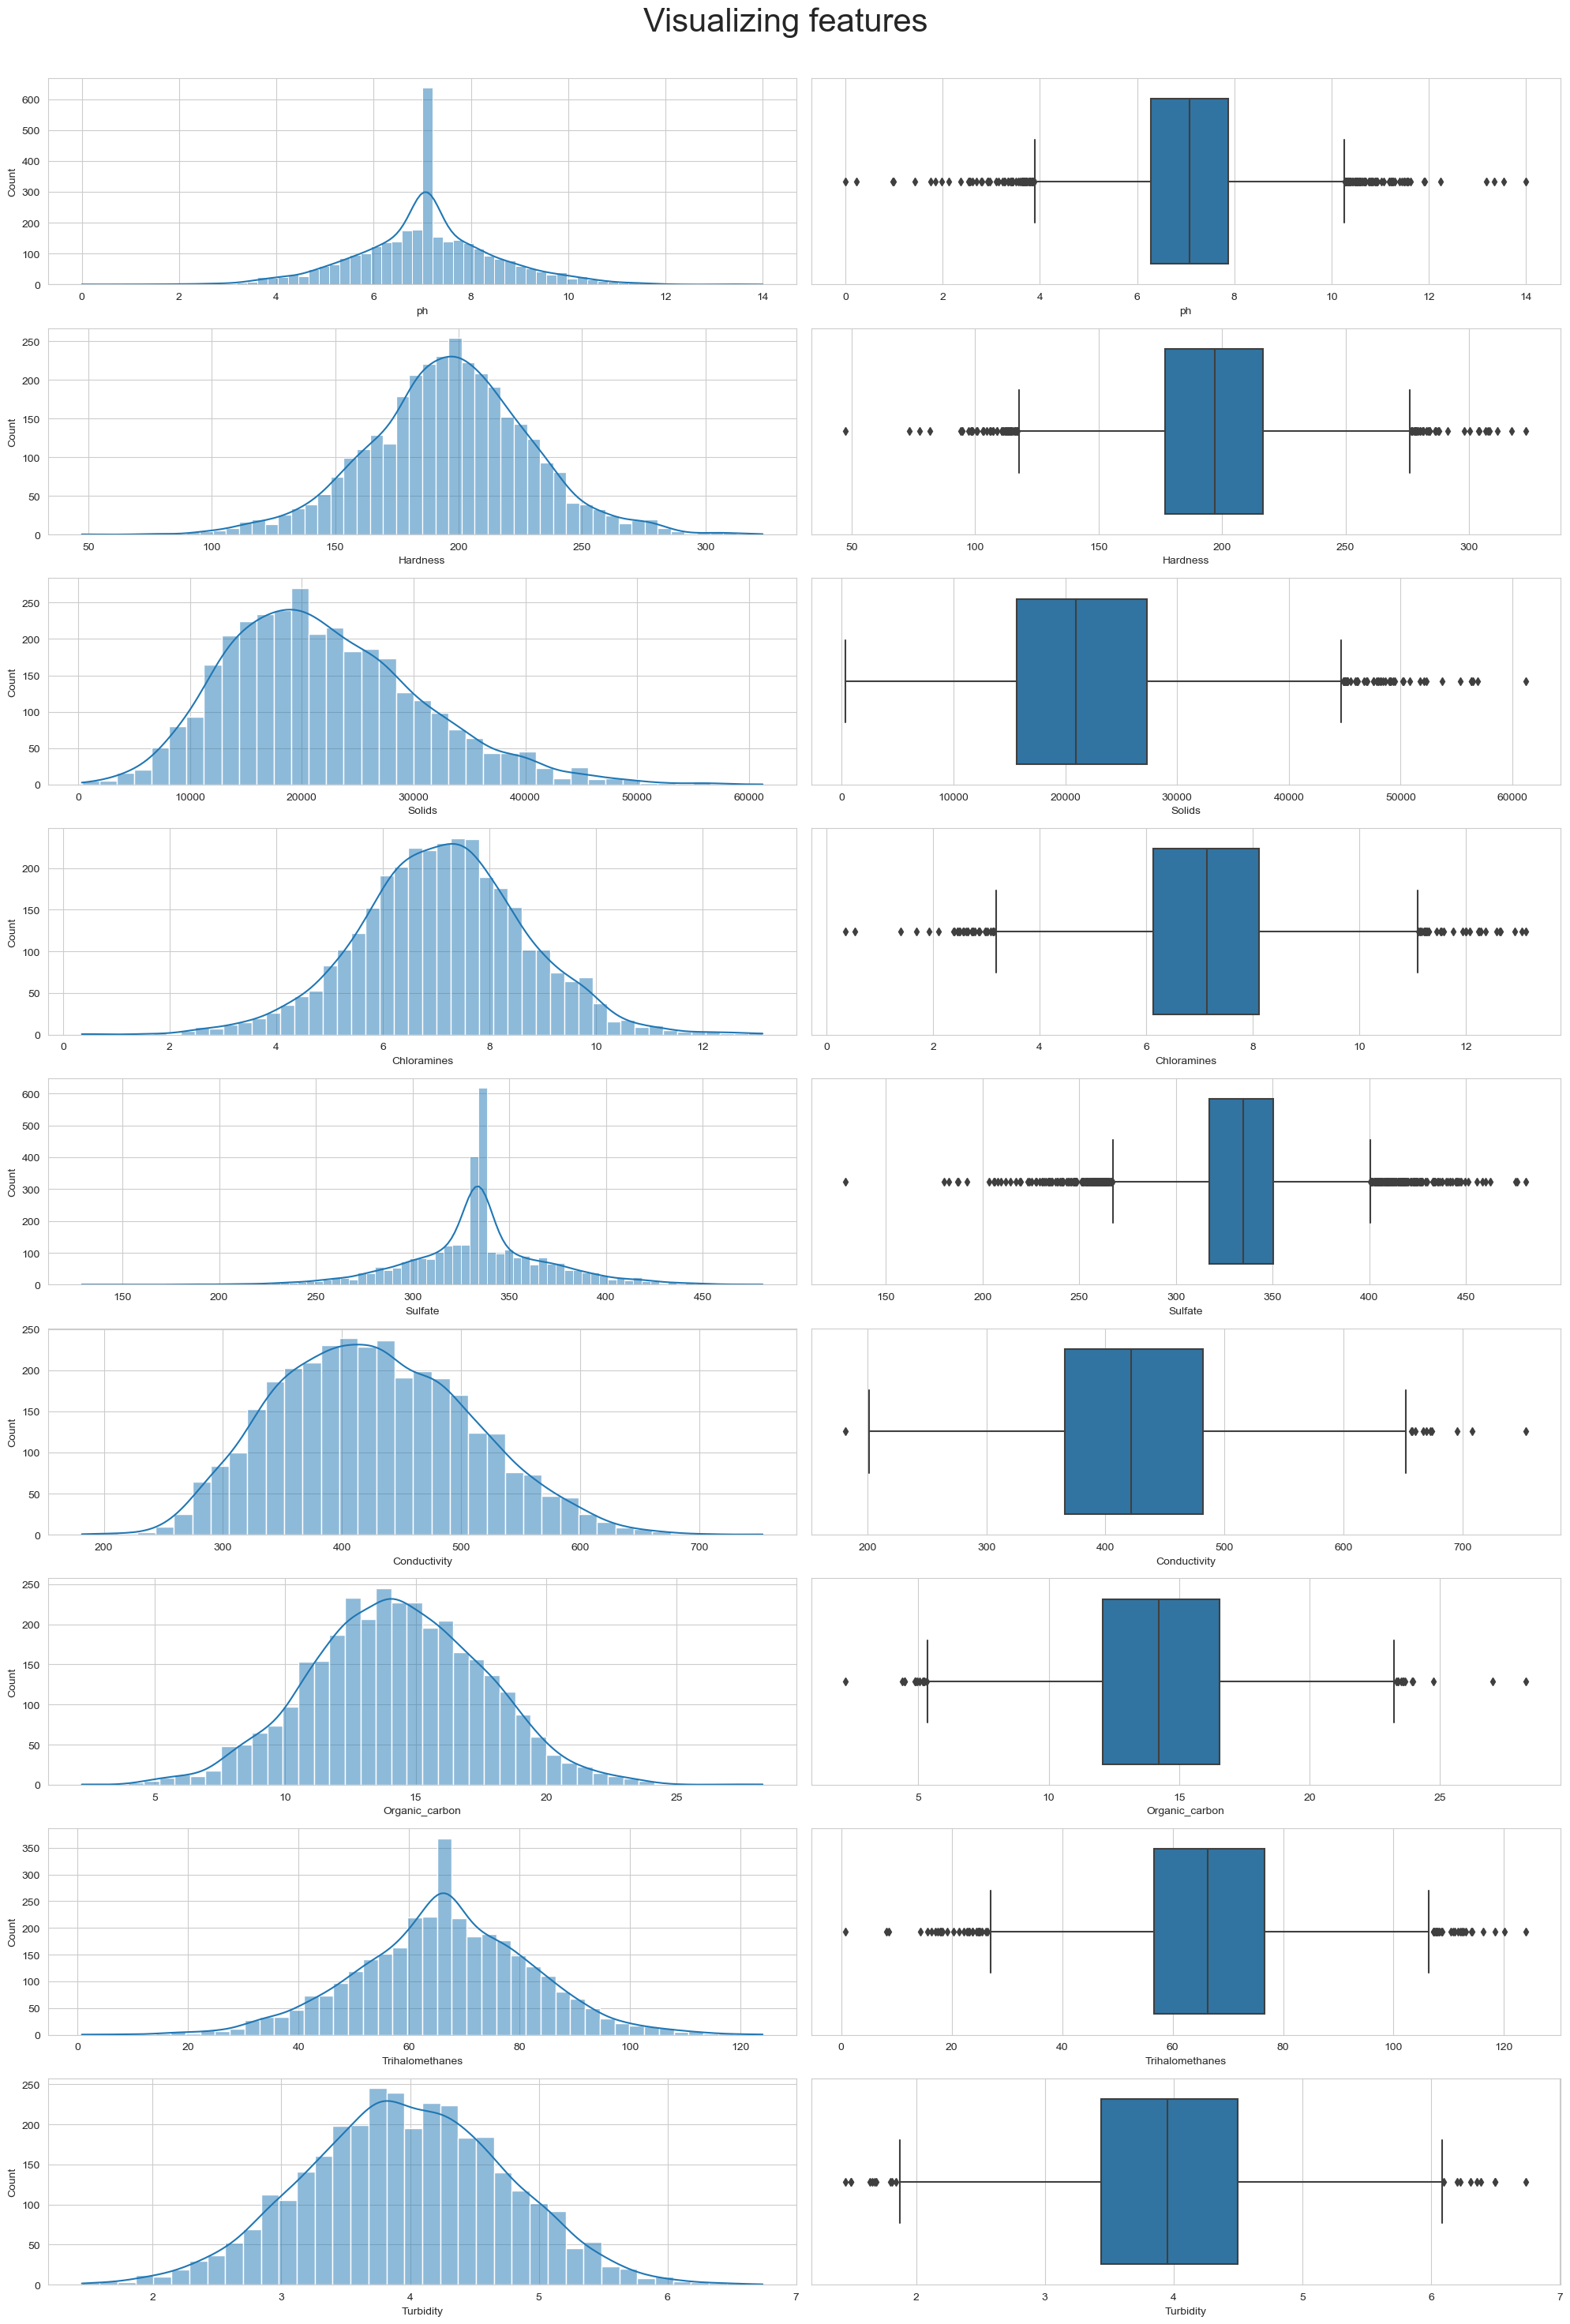

In [23]:
import warnings
warnings.filterwarnings('ignore')

fig,ax = plt.subplots(len(features), 2, figsize = (20,30))

for index, i in enumerate(features):
    sns.histplot((df1[i]), ax = ax[index,0], kde = True)
    sns.boxplot((df1[i]), ax = ax[index,1])
    
fig.tight_layout()
fig.subplots_adjust(top = 0.95)

plt.suptitle('Visualizing features', fontsize=30)

> After analyzing these graphs, the following hypotheses can be made:
> * Some features **nearly distributed normally**.
> * There are **outliers** in some features.

* Feature Normalization

In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

for i in features:
    df1[i] = scaler.fit_transform(df1[[i]])

Text(0.5, 0.98, 'Visualizing features (after normalization)')

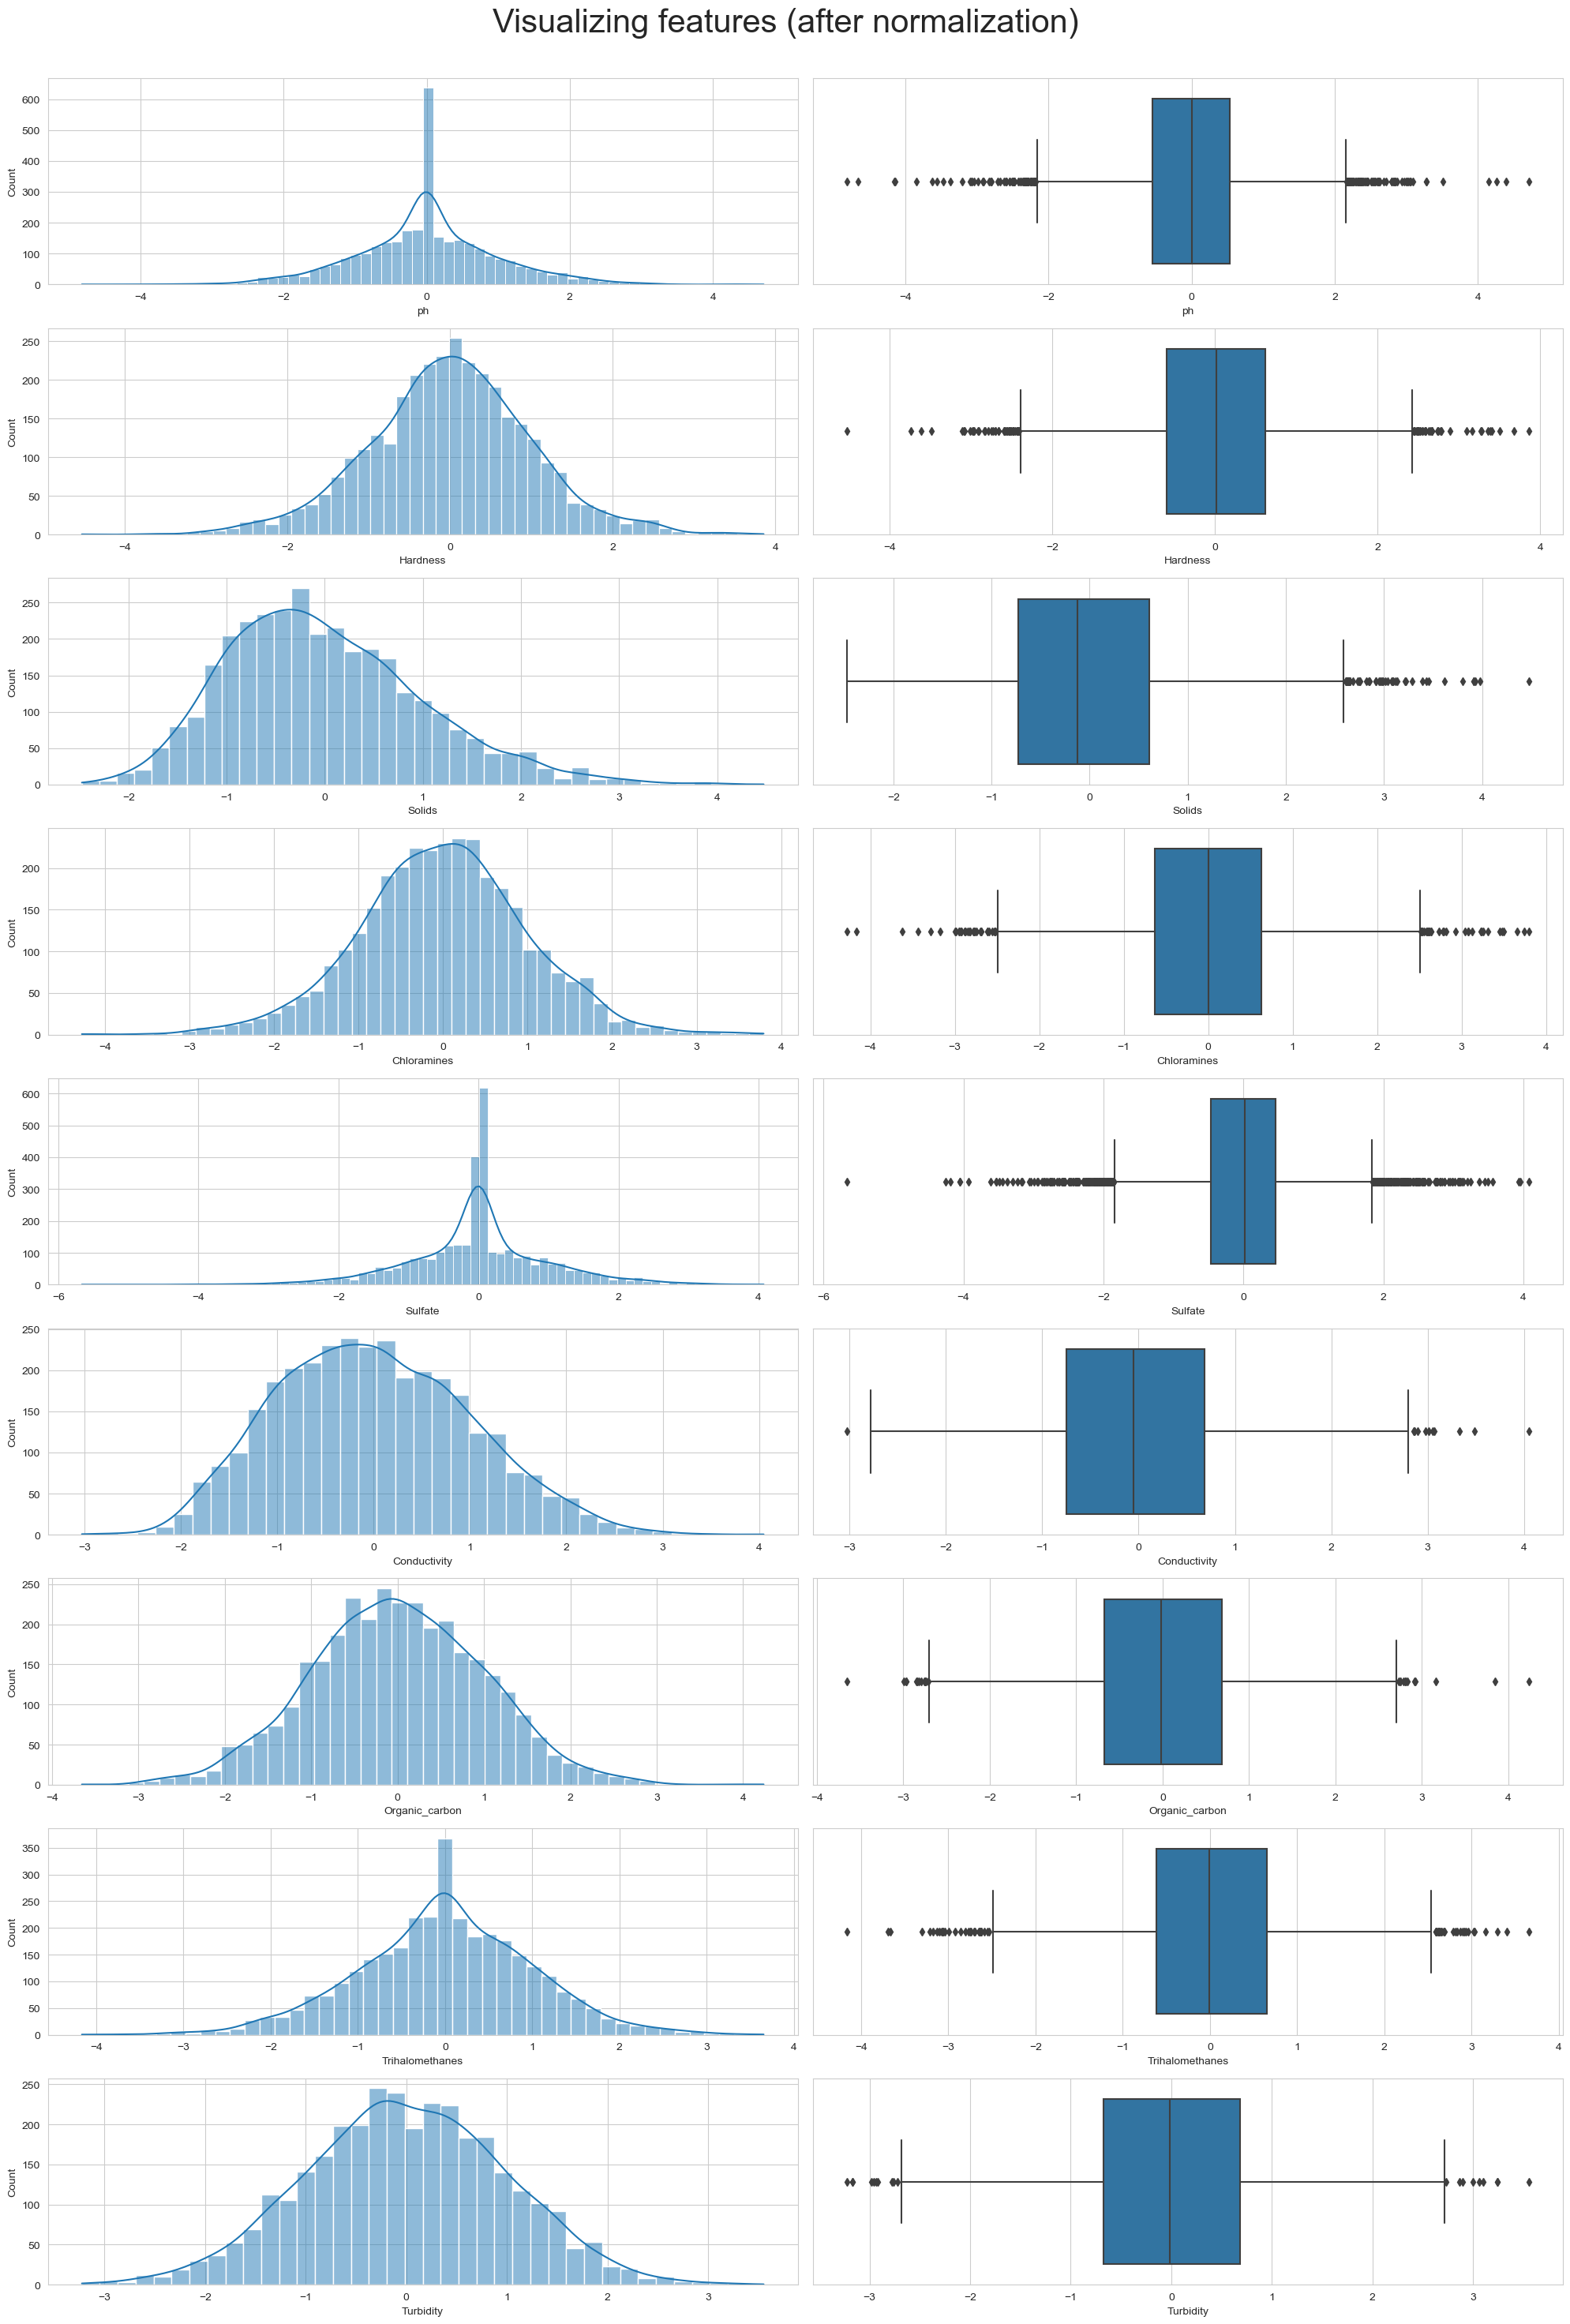

In [25]:
import warnings
warnings.filterwarnings('ignore')

fig,ax = plt.subplots(len(features), 2, figsize = (20,30))

for index, i in enumerate(features):
    sns.histplot((df1[i]), ax = ax[index,0], kde = True)
    sns.boxplot((df1[i]), ax = ax[index,1])
    
fig.tight_layout()
fig.subplots_adjust(top = 0.95)

plt.suptitle('Visualizing features (after normalization)', fontsize=30)

**Target**

<AxesSubplot:xlabel='Potability', ylabel='count'>

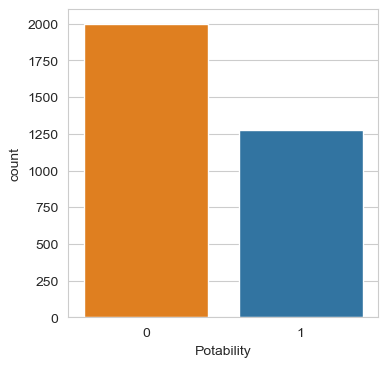

In [26]:
plt.figure(figsize=(4, 4))
sns.countplot(data = df1, x = 'Potability', palette = palette)

> There is **unbalancedness** in target.

In [27]:
#Save to file
df1.to_csv('water_quality_cleaned.csv')

**Conclusion**:
* Features are normalized by Standard Scaler method.
* Target distributes unbalanced.

<a id="2.4"></a>
<div style="color:white;
           display:fill;
           border-radius:30px;
           background-color:#AECEEE;
           font-size:170%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 4px;
          text-align:center;
          color:white;">
          2.4 Bivariate analysis
</p>
</div>

Text(0.5, 1.08, 'Feature Distribution')

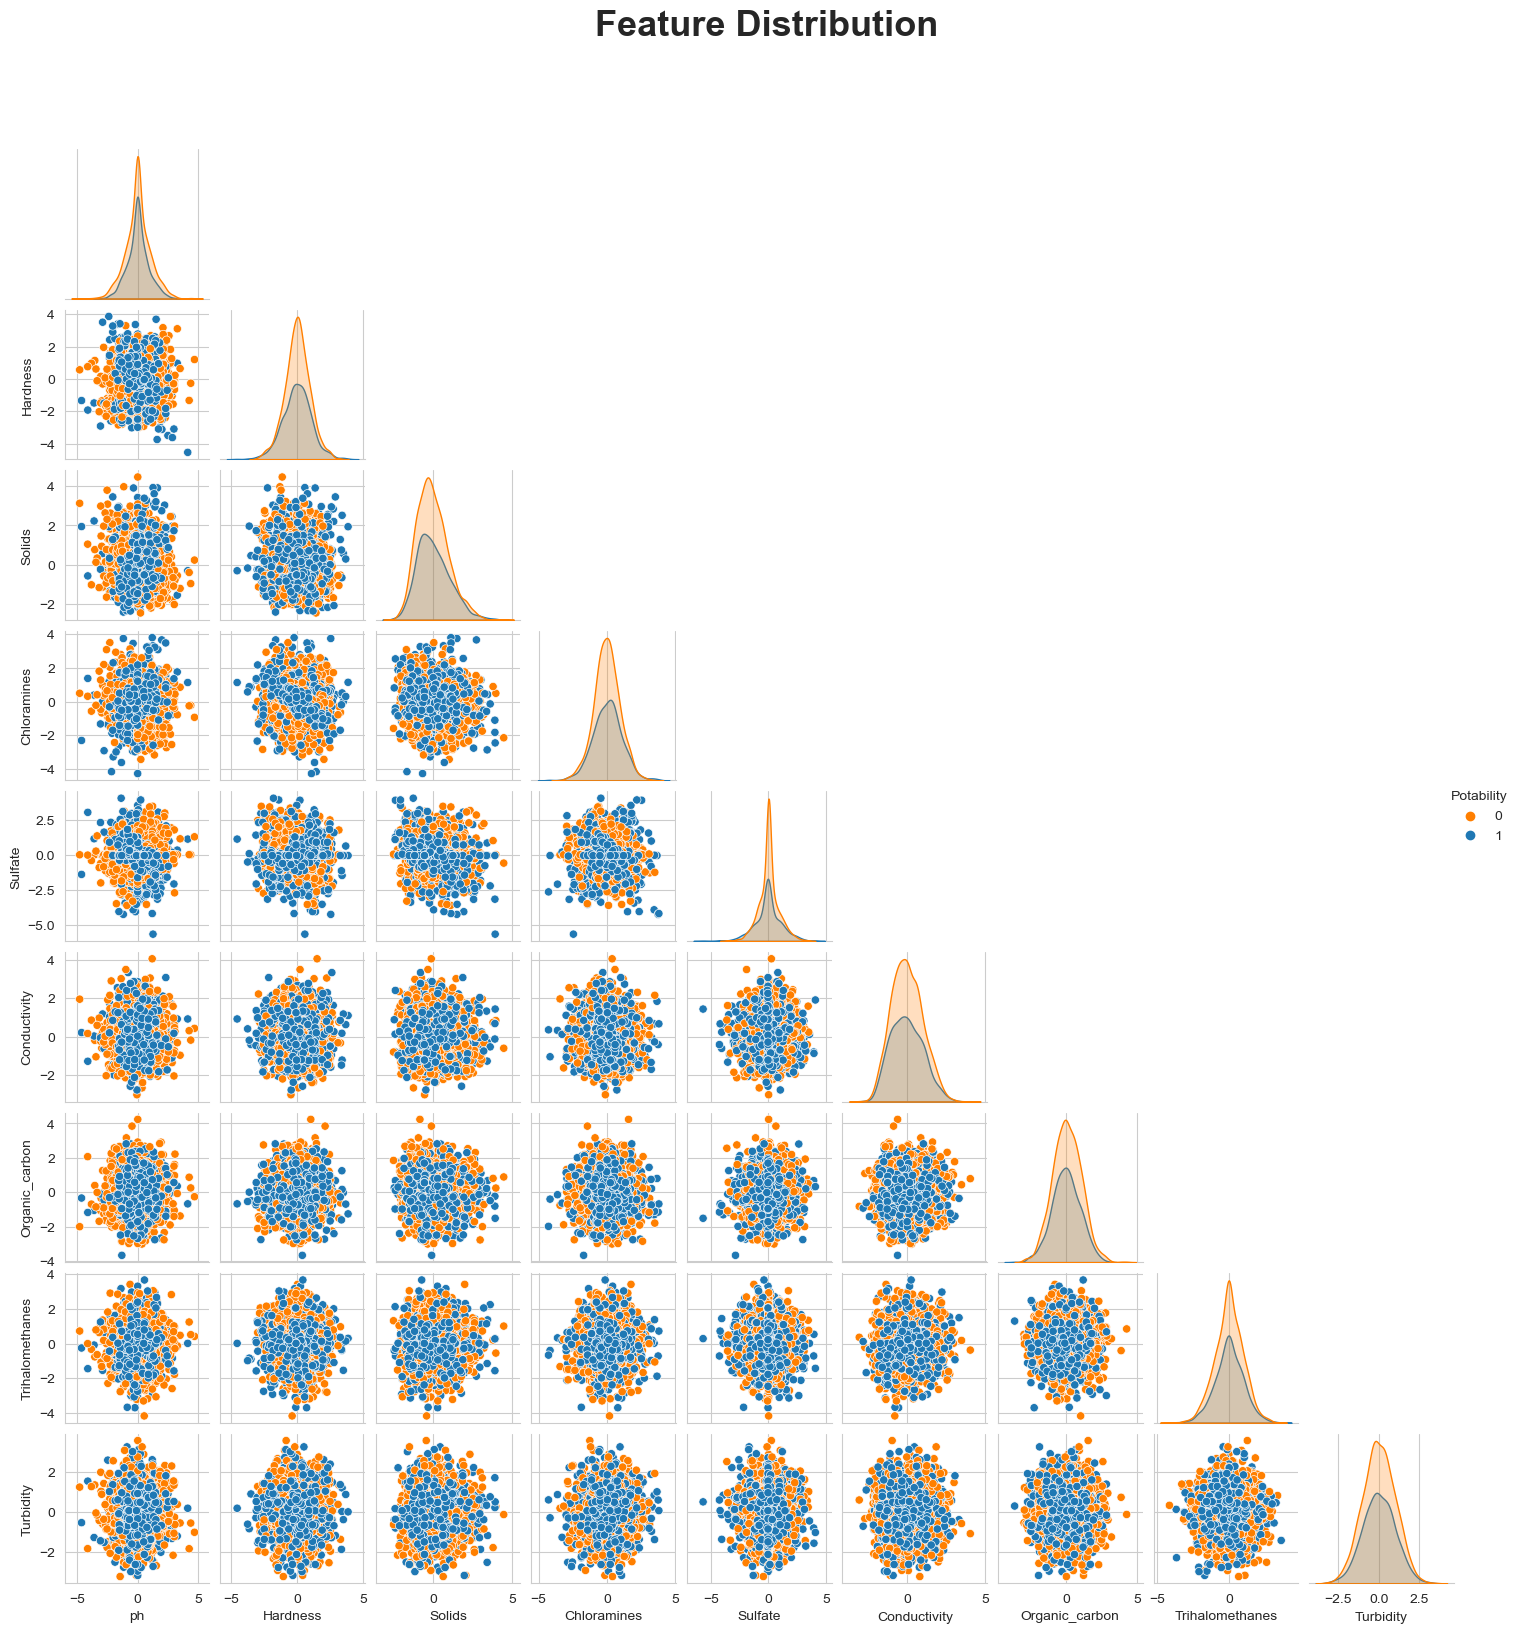

In [28]:
ax = sns.pairplot(df1, hue = 'Potability', diag_kind = 'kde', kind = 'scatter', palette = palette, corner = True)
ax.fig.set_size_inches(15, 15)
ax.fig.suptitle('Feature Distribution', y = 1.08, size = 26, weight = 'bold')

> Generally, there are some differences in the distribution of features between drinkable water and undrinkable water.

Text(0.5, 1.0, 'Correlation of Features')

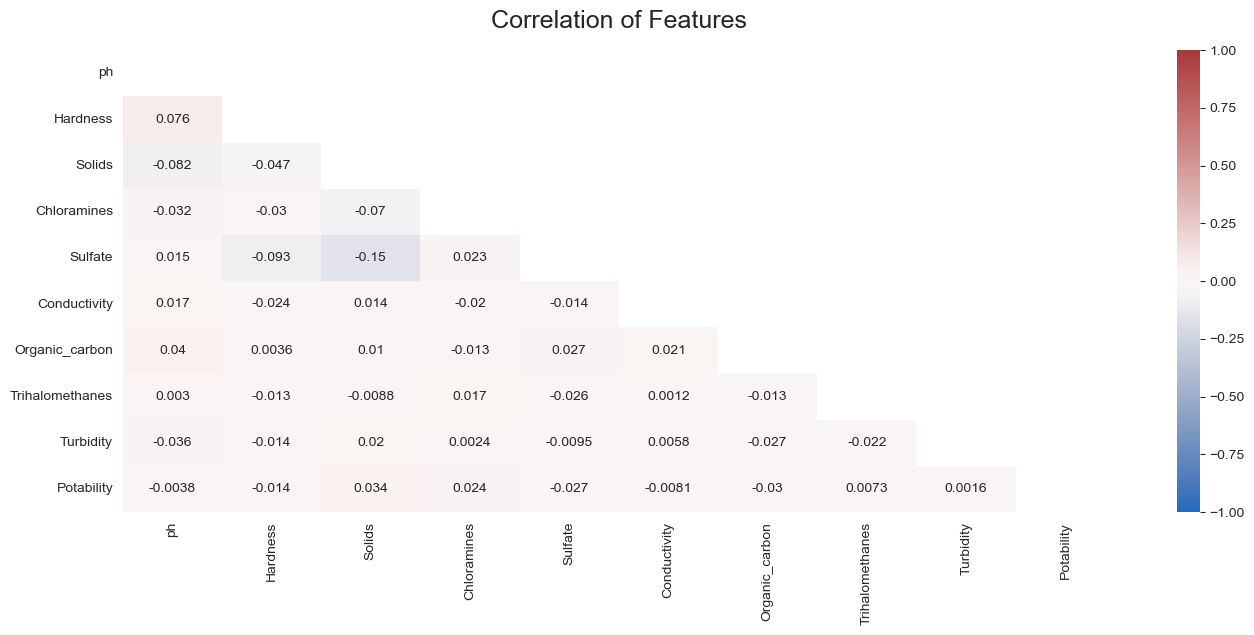

In [29]:
plt.figure(figsize = (16, 6))

# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(df1.corr(), dtype = np.bool))

heatmap = sns.heatmap(df1.corr(), mask = mask, vmin = -1, vmax = 1, annot = True, cmap = 'vlag')

heatmap.set_title('Correlation of Features', fontdict = {'fontsize': 18}, pad = 16)

> Correlation coefficients between features are **small**. So there might no multicollinearity error.

**Conclusion**:
* Distribution of features between Dinkable and Undinkable are different.
* Correlation between features are small.

<a id="3"></a>
<div style="color:white;
           display:fill;
           border-radius:30px;
           background-color:#93BEE9;
           font-size:250%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 8px;
          text-align:center;
          color:white;">
          3. Model Selection
</p>
</div>

[Return Table of Contents](#Table)

In [30]:
#Split
from sklearn.model_selection import train_test_split, KFold

#Evaluate
from sklearn import metrics
from sklearn.model_selection import cross_validate, cross_val_score

#Models
from sklearn.linear_model import LogisticRegression,RidgeClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

#Hyper-Parameter-Tuning
from sklearn.model_selection import GridSearchCV

In [31]:
# Droping the target varaiable
X = df1.drop('Potability', axis = 1)
y = df1['Potability']

In [32]:
#spliting the train test
x_train, x_test, y_train, y_test = train_test_split(X , y, test_size = 0.3, random_state = 42, stratify = y)

print(f'x_train shape: {x_train.shape}, y_train shape: {y_train.shape}')
print(f'x_test shape: {x_test.shape}, y_test shape: {y_test.shape}')

x_train shape: (2293, 9), y_train shape: (2293,)
x_test shape: (983, 9), y_test shape: (983,)


<a id="3.1"></a>
<div style="color:white;
           display:fill;
           border-radius:30px;
           background-color:#AECEEE;
           font-size:170%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 4px;
          text-align:center;
          color:white;">
          3.1 Logistics Regression
</p>
</div>

In [33]:
logreg = LogisticRegression(random_state = 42)
kfold = KFold(shuffle = True, random_state = 42)

scoring = ['accuracy', 'precision', 'recall', 'f1'] 

logreg_scores = cross_validate(
    logreg, x_train, y_train, 
    cv = kfold, n_jobs = 2, scoring = scoring
)

In [34]:
logreg_scores = pd.DataFrame(logreg_scores)
logreg_scores

fit_time  score_time  test_accuracy  test_precision  test_recall  test_f1
0  0.031244         0.0       0.614379             0.0          0.0      0.0
1  0.031244         0.0       0.614379             0.0          0.0      0.0
2  0.000000         0.0       0.596950             0.0          0.0      0.0
3  0.000000         0.0       0.609170             0.0          0.0      0.0
4  0.015618         0.0       0.613537             0.0          0.0      0.0

In [35]:
accuracy = logreg_scores['test_accuracy'].mean()
std = logreg_scores['test_accuracy'].std()

print(f'{accuracy:.2f} accuracy with a standard deviation of {std:.2f}')

0.61 accuracy with a standard deviation of 0.01


> * Average of accuracy score is not too good, even though it seems stable (low standard deviation)
> * F1 scores of 5 times (trade off between Precision score and Recall score) are quite bad

<a id="3.2"></a>
<div style="color:white;
           display:fill;
           border-radius:30px;
           background-color:#AECEEE;
           font-size:170%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 4px;
          text-align:center;
          color:white;">
          3.2 Ridge Classification
</p>
</div>

In [36]:
ridge = RidgeClassifier(random_state = 42)
kfold = KFold(shuffle = True, random_state = 42)

scoring = ['accuracy', 'precision', 'recall', 'f1'] 

ridge_scores = cross_validate(
    ridge, x_train, y_train, 
    cv = kfold, n_jobs = 2, scoring = scoring
)

In [37]:
ridge_scores = pd.DataFrame(ridge_scores)
ridge_scores

fit_time  score_time  test_accuracy  test_precision  test_recall  test_f1
0  0.019944    0.005984       0.614379             0.0          0.0      0.0
1  0.018947    0.003989       0.614379             0.0          0.0      0.0
2  0.003990    0.006056       0.596950             0.0          0.0      0.0
3  0.008050    0.000000       0.609170             0.0          0.0      0.0
4  0.000000    0.000000       0.613537             0.0          0.0      0.0

In [38]:
accuracy = ridge_scores['test_accuracy'].mean()
std = ridge_scores['test_accuracy'].std()

print(f'{accuracy:.2f} accuracy with a standard deviation of {std:.2f}')

0.61 accuracy with a standard deviation of 0.01


> * Ridge Classifier is same as Logistics Regression

<a id="3.3"></a>
<div style="color:white;
           display:fill;
           border-radius:30px;
           background-color:#AECEEE;
           font-size:170%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 4px;
          text-align:center;
          color:white;">
          3.3 Support Vector Machine
</p>
</div>

In [39]:
svc = SVC(random_state = 42)
kfold = KFold(shuffle = True, random_state = 42)

scoring = ['accuracy', 'precision', 'recall', 'f1'] 

svc_scores = cross_validate(
    svc, x_train, y_train, 
    cv = kfold, n_jobs = 2, scoring = scoring
)

In [40]:
svc_scores = pd.DataFrame(svc_scores)
svc_scores

fit_time  score_time  test_accuracy  test_precision  test_recall   test_f1
0  0.154604    0.078105       0.660131        0.632911     0.282486  0.390625
1  0.153606    0.078105       0.671024        0.680556     0.276836  0.393574
2  0.156239    0.062482       0.653595        0.696970     0.248649  0.366534
3  0.156239    0.078081       0.670306        0.689189     0.284916  0.403162
4  0.140642    0.078089       0.665939        0.646341     0.299435  0.409266

In [41]:
accuracy = svc_scores['test_accuracy'].mean()
std = svc_scores['test_accuracy'].std()

print(f'{accuracy:.2f} accuracy with a standard deviation of {std:.2f}')

0.66 accuracy with a standard deviation of 0.01


> * SVC is better than Logistics & Ridge with higher accuracy and f1 score.

<a id="3.4"></a>
<div style="color:white;
           display:fill;
           border-radius:30px;
           background-color:#AECEEE;
           font-size:170%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 4px;
          text-align:center;
          color:white;">
          3.4 Decision Tree Classification
</p>
</div>

In [42]:
tree = DecisionTreeClassifier(random_state = 42)
kfold = KFold(shuffle = True, random_state = 42)

scoring = ['accuracy', 'precision', 'recall', 'f1'] 

tree_scores = cross_validate(
    tree, x_train, y_train, 
    cv = kfold, n_jobs = 2, scoring = scoring
)

In [43]:
tree_scores = pd.DataFrame(tree_scores)
tree_scores

fit_time  score_time  test_accuracy  test_precision  test_recall   test_f1
0  0.015662    0.000000       0.716776        0.637427     0.615819  0.626437
1  0.015662    0.000000       0.745098        0.666667     0.677966  0.672269
2  0.020188    0.003990       0.755991        0.710983     0.664865  0.687151
3  0.023180    0.003989       0.733624        0.661017     0.653631  0.657303
4  0.011967    0.003990       0.700873        0.599010     0.683616  0.638522

In [44]:
accuracy = tree_scores['test_accuracy'].mean()
std = tree_scores['test_accuracy'].std()

print(f'{accuracy:.2f} accuracy with a standard deviation of {std:.2f}')

0.73 accuracy with a standard deviation of 0.02


> * DecisionTree is better than Logistics, Ridge & SVC with higher accuracy and f1 score. 

<a id="3.5"></a>
<div style="color:white;
           display:fill;
           border-radius:30px;
           background-color:#AECEEE;
           font-size:170%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 4px;
          text-align:center;
          color:white;">
          3.5 Random Forest Classification
</p>
</div>

In [45]:
forest = RandomForestClassifier(random_state = 42)
kfold = KFold(shuffle = True, random_state = 42)

scoring = ['accuracy', 'precision', 'recall', 'f1'] 

forest_scores = cross_validate(
    forest, x_train, y_train, 
    cv = kfold, n_jobs = 2, scoring = scoring
)

In [46]:
forest_scores = pd.DataFrame(forest_scores)
forest_scores

fit_time  score_time  test_accuracy  test_precision  test_recall   test_f1
0  0.369233    0.015622       0.764706        0.751825     0.581921  0.656051
1  0.368234    0.015622       0.788671        0.766667     0.649718  0.703364
2  0.386156    0.026841       0.801743        0.830986     0.637838  0.721713
3  0.402026    0.015958       0.781659        0.788321     0.603352  0.683544
4  0.367147    0.015618       0.794760        0.754601     0.694915  0.723529

In [47]:
accuracy = forest_scores['test_accuracy'].mean()
std = forest_scores['test_accuracy'].std()

print(f'{accuracy:.2f} accuracy with a standard deviation of {std:.2f}')

0.79 accuracy with a standard deviation of 0.01


> * RandomForest is better than DecisionTree with higher accuracy and f1 score.

<a id="3.6"></a>
<div style="color:white;
           display:fill;
           border-radius:30px;
           background-color:#AECEEE;
           font-size:170%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 4px;
          text-align:center;
          color:white;">
          3.6 XG Boost Classification
</p>
</div>

In [48]:
xgb = XGBClassifier(random_state = 42)
kfold = KFold(shuffle = True, random_state = 42)

scoring = ['accuracy', 'precision', 'recall', 'f1'] 

xgb_scores = cross_validate(
    xgb, x_train, y_train, 
    cv = kfold, n_jobs = 2, scoring = scoring
)

In [49]:
xgb_scores = pd.DataFrame(xgb_scores)
xgb_scores

fit_time  score_time  test_accuracy  test_precision  test_recall   test_f1
0  0.277158    0.000000       0.762527        0.736111     0.598870  0.660436
1  0.277158    0.015623       0.786492        0.739394     0.689266  0.713450
2  0.234318    0.015624       0.801743        0.805195     0.670270  0.731563
3  0.234318    0.015624       0.744541        0.709459     0.586592  0.642202
4  0.234318    0.000000       0.786026        0.742331     0.683616  0.711765

In [50]:
accuracy = xgb_scores['test_accuracy'].mean()
std = xgb_scores['test_accuracy'].std()

print(f'{accuracy:.2f} accuracy with a standard deviation of {std:.2f}')

0.78 accuracy with a standard deviation of 0.02


> * RandomForest is better than XGBoost with higher average accuracy score and lower standard deviation.

<a id="3.7"></a>
<div style="color:white;
           display:fill;
           border-radius:30px;
           background-color:#AECEEE;
           font-size:170%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 4px;
          text-align:center;
          color:white;">
          3.7 Model Comparision
</p>
</div>

In [51]:
mod = {logreg: 'Logistics Regression', ridge: 'Ridge Classification', svc: 'Support Vector Machine',
      tree: 'Decision Tree Classification', forest: 'Random Forest Classification', xgb: 'XGBoost Classification'}
accuracy_average = []
accuracy_std = []
f1_average = []
f1_std = []

model = mod.keys()
scoring = ['accuracy', 'precision', 'recall', 'f1'] 
kfold = KFold(shuffle = True, random_state = 42)

for m in model:
    accuracy_average.append(cross_val_score(m, x_train, y_train, scoring = scoring[0], cv = kfold, n_jobs = 2).mean())
    accuracy_std.append(cross_val_score(m, x_train, y_train, scoring = scoring[0], cv = kfold, n_jobs = 2).std())
    f1_average.append(cross_val_score(m, x_train, y_train, scoring = scoring[3], cv = kfold, n_jobs = 2).mean())
    f1_std.append(cross_val_score(m, x_train, y_train, scoring = scoring[3], cv = kfold, n_jobs = 2).std())

In [52]:
model_df = pd.DataFrame(list(zip(mod.values(), accuracy_average, accuracy_std, f1_average, f1_std)),
                        columns = ['model','accuracy_score_average', 'accuracy_score_std', 'f1_score_average', 'f1_score_std'])

model_df.sort_values(by = ['accuracy_score_average', 'f1_score_average'], ascending = False)

model  accuracy_score_average  accuracy_score_std  \
4  Random Forest Classification                0.786308            0.012677   
5        XGBoost Classification                0.776266            0.020219   
3  Decision Tree Classification                0.730473            0.019691   
2        Support Vector Machine                0.664199            0.006571   
0          Logistics Regression                0.609683            0.006654   
1          Ridge Classification                0.609683            0.006654   

   f1_score_average  f1_score_std  
4          0.697640      0.025341  
5          0.691883      0.034328  
3          0.656336      0.021980  
2          0.392632      0.014653  
0          0.000000      0.000000  
1          0.000000      0.000000

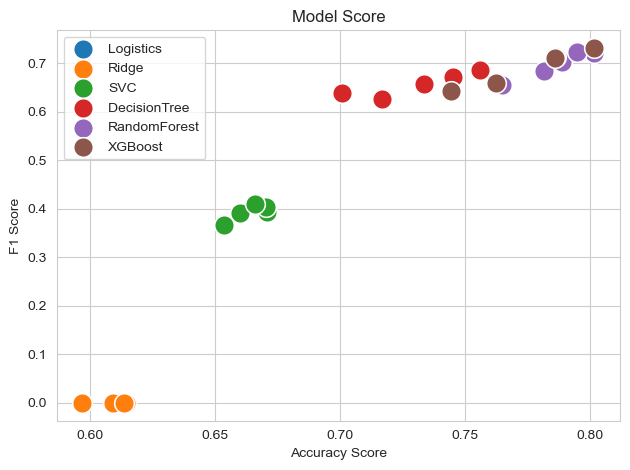

In [53]:
s = 200
x = 'test_accuracy'
y = 'test_f1'

table = [logreg_scores, ridge_scores, svc_scores, tree_scores, forest_scores, xgb_scores]
label = ['Logistics', 'Ridge', 'SVC', 'DecisionTree ', 'RandomForest','XGBoost']

for i in range (len(table)):
    ax = sns.scatterplot(data = table[i], x = x, y = y, s = s, label = label[i])
     
ax.set(xlabel = 'Accuracy Score', ylabel = 'F1 Score', title = 'Model Score')
plt.tight_layout()

> **Random Forest Classifier** is selected because overall| it has the highest accuracy score and f1 score.

**Conclusion**:
After comparing between 
 * Logistics Regression
 * Ridge Classification 
 * Support Vector Machine 
 * Decision Tree Classification 
 * Random Forest Classification
 * XG Boost Classification

-> **Random Forest Classification** is the most suitable mpdel.

<a id="4"></a>
<div style="color:white;
           display:fill;
           border-radius:30px;
           background-color:#93BEE9;
           font-size:250%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 8px;
          text-align:center;
          color:white;">
          4. Model Evaluation
</p>
</div>

[Return Table of Contents](#Table)

In [54]:
forest = RandomForestClassifier(random_state = 42)

forest.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [55]:
y_pred = forest.predict(x_test)

accuracy = metrics.accuracy_score(y_test, y_pred)*100
f1 = metrics.f1_score(y_test, y_pred)*100
precision = metrics.precision_score(y_test, y_pred)*100
recall = metrics.recall_score(y_test, y_pred)*100

result = [accuracy, f1, precision, recall]
print(result)

[79.34893184130215, 69.74664679582713, 81.25, 61.096605744125334]


In [56]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.91      0.84       600
           1       0.81      0.61      0.70       383

    accuracy                           0.79       983
   macro avg       0.80      0.76      0.77       983
weighted avg       0.80      0.79      0.79       983



> * Accuracy score = 0.79 -> The model could predict **79%** data exactly.

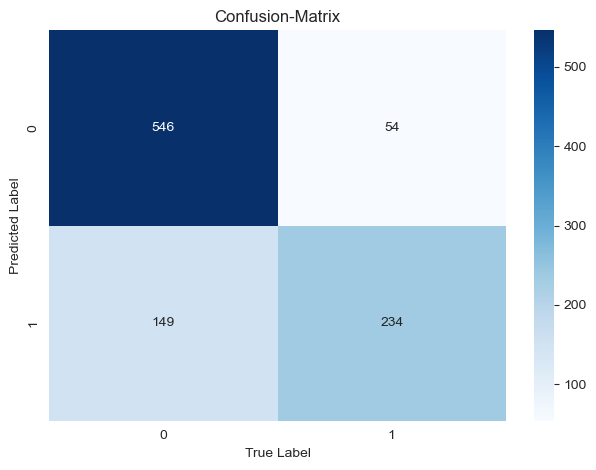

In [57]:
metrics.confusion_matrix(y_test, y_pred)

ax = sns.heatmap(metrics.confusion_matrix(y_test, y_pred), annot = True, cbar = True, fmt = 'g', cmap = 'Blues')

ax.set(xlabel = 'True Label', ylabel = 'Predicted Label', title = 'Confusion-Matrix')

plt.tight_layout()  

In [58]:
pd.Series(forest.feature_importances_, index = x_train.columns).sort_values(ascending = False)

Sulfate            0.271583
ph                 0.190920
Chloramines        0.090252
Hardness           0.087329
Solids             0.080189
Trihalomethanes    0.073020
Organic_carbon     0.069966
Conductivity       0.069334
Turbidity          0.067406
dtype: float64

> `Sulfate`, `ph` are the two strongest features effecting on the classification of `Potability`.

**Conclusion**:
* Random Forest could predict **79%** Potability of Water exactly.
* `Sulfate`, `ph` are the two strongest features.

<a id="5"></a>
<div style="color:white;
           display:fill;
           border-radius:30px;
           background-color:#93BEE9;
           font-size:250%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 8px;
          text-align:center;
          color:white;">
          5. Hyperparameter Tuning
</p>
</div>

[Return Table of Contents](#Table)

In [59]:
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_features': [3, 4, 5, 6],
    'max_depth': [3, 5, 7, 10]
}

forest = RandomForestClassifier(random_state = 42)
kfold = KFold(shuffle = True, random_state = 42)

gs = GridSearchCV(
    forest, 
    param_grid, 
    scoring = scoring,
    cv = kfold,
    n_jobs = 2, 
    verbose = 5, 
    refit = False 
)

gs_result = gs.fit(x_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


In [60]:
gs_result_df = pd.DataFrame(gs_result.cv_results_)
gs_result_df.shape

(48, 40)

In [61]:
params = gs_result_df['params'].apply(pd.Series)

gs_result_df = gs_result_df.join(params)
gs_result_df.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.203228      0.000698         0.002050    2.530586e-03   
1       0.292112      0.006378         0.016200    1.155615e-03   
2       0.391103      0.011114         0.018745    6.248808e-03   
3       0.230962      0.007887         0.013247    6.780869e-03   
4       0.337420      0.007645         0.015622    6.325960e-07   

  param_max_depth param_max_features param_n_estimators  \
0               3                  3                100   
1               3                  3                150   
2               3                  3                200   
3               3                  4                100   
4               3                  4                150   

                                              params  split0_test_accuracy  \
0  {'max_depth': 3, 'max_features': 3, 'n_estimat...              0.740741   
1  {'max_depth': 3, 'max_features': 3, 'n_estimat...              0.742919   
2  {'max_depth': 3, 'max_features': 3, 'n_estimat...              0.747277   
3  {'max_depth': 3, 'max_features': 4, 'n_estimat...              0.755991   
4  {'max_depth': 3, 'max_features': 4, 'n_estimat...              0.751634   

   split1_test_accuracy  ...  split1_test_f1  split2_test_f1  split3_test_f1  \
0              0.747277  ...        0.532258        0.537549        0.489451   
1              0.738562  ...        0.508197        0.531746        0.489451   
2              0.751634  ...        0.544000        0.525896        0.495798   
3              0.753813  ...        0.556863        0.550388        0.493724   
4              0.751634  ...        0.554688        0.561538        0.500000   

   split4_test_f1  mean_test_f1  std_test_f1  rank_test_f1  max_depth  \
0        0.594595      0.531189     0.036471            47          3   
1        0.589147      0.523708     0.035561            48          3   
2        0.594595      0.534579     0.033920            46          3   
3        0.594595      0.546552     0.032581            45          3   
4        0.607004      0.551963     0.034829            44          3   

   max_features  n_estimators  
0             3           100  
1             3           150  
2             3           200  
3             4           100  
4             4           150  

[5 rows x 43 columns]

In [62]:
mean_cols = [i for i in gs_result_df.columns if i.startswith('mean')]
rank_cols = [i for i in gs_result_df.columns if i.startswith('rank')]
report = gs_result_df[['n_estimators', 'max_features', 'max_depth', *mean_cols, *rank_cols]].dropna()
report

n_estimators  max_features  max_depth  mean_fit_time  mean_score_time  \
0            100             3          3       0.203228         0.002050   
1            150             3          3       0.292112         0.016200   
2            200             3          3       0.391103         0.018745   
3            100             4          3       0.230962         0.013247   
4            150             4          3       0.337420         0.015622   
5            200             4          3       0.440525         0.015617   
6            100             5          3       0.259322         0.006249   
7            150             5          3       0.375296         0.015624   
8            200             5          3       0.506129         0.018746   
9            100             6          3       0.281186         0.006249   
10           150             6          3       0.418850         0.015620   
11           200             6          3       0.558750         0.015614   
12           100             3          5       0.249942         0.009367   
13           150             3          5       0.368674         0.015620   
14           200             3          5       0.487390         0.015623   
15           100             4          5       0.287433         0.012493   
16           150             4          5       0.428024         0.015626   
17           200             4          5       0.568623         0.018747   
18           100             5          5       0.331170         0.012497   
19           150             5          5       0.494865         0.013327   
20           200             5          5       0.656339         0.018740   
21           100             6          5       0.370321         0.015619   
22           150             6          5       0.552998         0.009371   
23           200             6          5       0.740460         0.018736   
24           100             3          7       0.284459         0.015632   
25           150             3          7       0.434254         0.015612   
26           200             3          7       0.568622         0.024995   
27           100             4          7       0.340536         0.012495   
28           150             4          7       0.509257         0.015613   
29           200             4          7       0.674841         0.021870   
30           100             5          7       0.390546         0.012496   
31           150             5          7       0.587352         0.015623   
32           200             5          7       0.781064         0.015624   
33           100             6          7       0.440526         0.015616   
34           150             6          7       0.662351         0.015615   
35           200             6          7       0.910650         0.018744   
36           100             3         10       0.342224         0.012498   
37           150             3         10       0.523214         0.020353   
38           200             3         10       0.679432         0.021971   
39           100             4         10       0.399919         0.012489   
40           150             4         10       0.612356         0.015622   
41           200             4         10       0.796701         0.024981   
42           100             5         10       0.459268         0.012498   
43           150             5         10       0.687336         0.018748   
44           200             5         10       0.915780         0.018736   
45           100             6         10       0.531474         0.015283   
46           150             6         10       0.791409         0.012930   
47           200             6         10       1.025859         0.021856   

    mean_test_accuracy  mean_test_precision  mean_test_recall  mean_test_f1  \
0             0.747933             0.967269          0.367697      0.531189   
1             0.745754             0.972729          0.359836      0.523

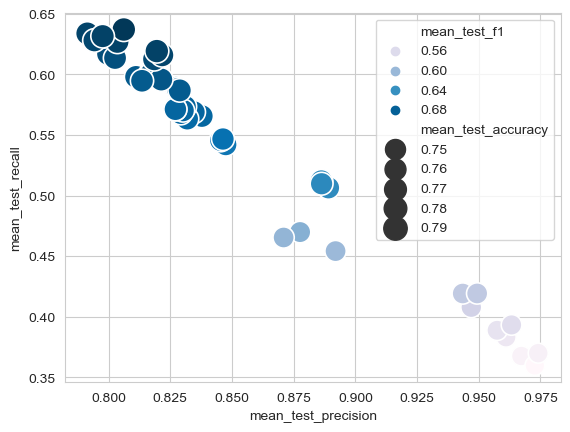

In [63]:
ax = sns.scatterplot(
    data = report.dropna(), 
    x = 'mean_test_precision', 
    y = 'mean_test_recall', 
    hue = 'mean_test_f1',
    size = 'mean_test_accuracy',
    sizes = (200, 300),
    palette = 'PuBu'
)

ax.legend(loc = 'best')

In [64]:
import plotly.express as px

fig = px.scatter(report, x='mean_test_precision', y='mean_test_recall', size='mean_test_accuracy', color='mean_test_f1',
                color_continuous_scale='Blues')
fig.show()

> After considering, the model parameter would be selected at the point where having F1 score highest but still keep balancing between Precision score and Recall score. 

In [65]:
# Parameter selection
n_estimators = 150
max_features = 3
max_depth = 10

forest = RandomForestClassifier(n_estimators = n_estimators, max_features = max_features, max_depth = max_depth)

forest.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, max_features=3, n_estimators=150)

In [66]:
y_pred = forest.predict(x_test)

accuracy_1 = metrics.accuracy_score(y_test, y_pred)*100
f1_1 = metrics.f1_score(y_test, y_pred)*100
precision_1 = metrics.precision_score(y_test, y_pred)*100
recall_1 = metrics.recall_score(y_test, y_pred)*100

result_1 = [accuracy_1, f1_1, precision_1, recall_1]
print(result_1)

[78.94201424211597, 68.10477657935284, 83.0827067669173, 57.702349869451695]


**Result Comparing**

In [67]:
compare = pd.DataFrame(data = zip(result, result_1), columns = ['Before Tuning', 'After Tuning'])
compare = compare.rename(index = {0: 'Accuracy', 1: 'F1', 2: 'Precision', 3: 'Recall'})
compare

Before Tuning  After Tuning
Accuracy       79.348932     78.942014
F1             69.746647     68.104777
Precision      81.250000     83.082707
Recall         61.096606     57.702350

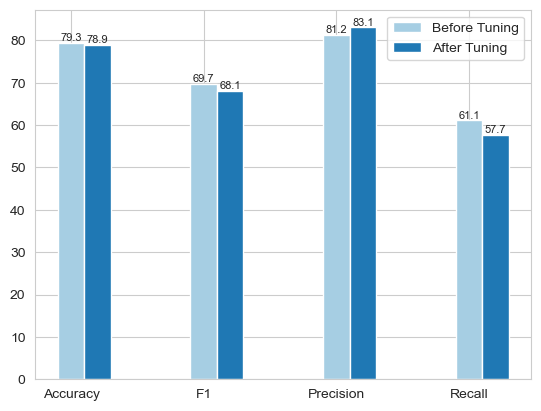

In [68]:
x = np.arange(compare.shape[0])
width = 0.2
  
# plot data in grouped manner of bar type
ax1 = plt.bar(x, compare.iloc[:,0], width, color = theme[0])
plt.bar_label(ax1, np.round(compare.iloc[:, 0], 1), fontsize = 8)

ax2 = plt.bar(x + width, compare.iloc[:,1], width, color = theme[1])
plt.bar_label(ax2, np.round(compare.iloc[:, 1], 1), fontsize = 8)

plt.xticks(x, compare.index)
plt.legend(compare.columns, loc = 'best')

plt.show()

> Parameter after tuning could improve model score.

**Conclusion**:
* Using GridSreachCV to tune hyparameter of the model.
* Hyperaparameters: n_estimators = 150, max_features = 3, max_depth = 10 

<a id="6"></a>
<div style="color:white;
           display:fill;
           border-radius:30px;
           background-color:#93BEE9;
           font-size:250%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 8px;
          text-align:center;
          color:white;">
          6. Final Model
</p>
</div>

[Return Table of Contents](#Table)

**Final Model**

In [69]:
forest = RandomForestClassifier(n_estimators = n_estimators, 
                                max_features = max_features, 
                                max_depth = max_depth, 
                                random_state = 42)

forest.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, max_features=3, n_estimators=150,
                       random_state=42)

In [70]:
y_pred = forest.predict(x_test)

In [71]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.93      0.85       600
           1       0.84      0.59      0.69       383

    accuracy                           0.80       983
   macro avg       0.81      0.76      0.77       983
weighted avg       0.80      0.80      0.79       983



> * The precision of class 0 is 0.78 and that of class 1 is 0.84 . It means that the model predicts **78%** of Undinkable Water and **84%** of Drinkable Water correctly.
> * The accuracy is 0.80. It means that the model predicts **80%** of Potability of Water correctly.

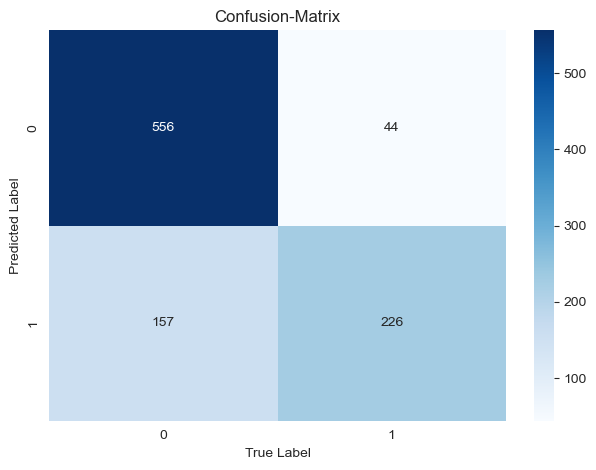

In [72]:
metrics.confusion_matrix(y_test, y_pred)

ax = sns.heatmap(metrics.confusion_matrix(y_test, y_pred), annot = True, cbar = True, fmt = 'g', cmap = 'Blues')

ax.set(xlabel = 'True Label', ylabel = 'Predicted Label', title = 'Confusion-Matrix')

plt.tight_layout()  

In [73]:
pd.Series(forest.feature_importances_, index = x_train.columns).sort_values(ascending = False)

Sulfate            0.339832
ph                 0.212242
Hardness           0.082681
Chloramines        0.080106
Solids             0.074541
Trihalomethanes    0.055193
Conductivity       0.053252
Organic_carbon     0.051895
Turbidity          0.050258
dtype: float64

> `Sulfate`, `ph` are the two strongest features effecting on the classification of `Potability`.

**Input Data For Trial**

In [74]:
ph = input('ph = ')
Hardness = input('Hardness = ')
Solids = input('Solids = ')
Chloramines = input('Chloramines = ')
Sulfate = input('Sulfate = ')
Conductivity = input('Conductivity = ')
Organic_carbon = input('Organic_carbon = ')
Trihalomethanes = input('Trihalomethanes = ')
Turbidity = input('Turbidity = ')

ph = 9.024845037
Hardness = 128.0966912
Solids = 19859.67648
Chloramines = 8.016422649
Sulfate = 300.150377
Conductivity = 451.143481
Organic_carbon = 14.77086294
Trihalomethanes = 73.77802565
Turbidity = 3.985250506


In [75]:
input = [ph, Hardness, Solids, Chloramines, Sulfate, 
         Conductivity, Organic_carbon, Trihalomethanes, Turbidity]
input_1 = [float(i) for i in input]

In [76]:
output = forest.predict(np.array([input_1]))

In [77]:
def final_result():
    if output == 0:
        print('Undrinkable')
    elif output == 1:
        print('Drinkable')

In [78]:
final_result()

Undrinkable


**Conclusion**:
* The model predicts **78%** of Undinkable Water and **84%** of Drinkable Water correctly. Moreover, **80%** of data could be predicted correctly.
* `Sulfate`, `ph` are the two strongest features effecting on the classification of Potability.
* Input data for trial & define function to test data result. The result is correct.

<a id="7"></a>
<div style="color:white;
           display:fill;
           border-radius:30px;
           background-color:#93BEE9;
           font-size:250%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
          text-align:center;
          color:white;">
          7. References
</p>
</div>

[Return Table of Contents](#Table)

* [Dataset: Water Quality](https://www.kaggle.com/datasets/adityakadiwal/water-potability)
* [Kaggle project: Water quality.Exploratory data analysis + ML(RF)](https://www.kaggle.com/code/georgyzubkov/water-quality-exploratory-data-analysis-ml-rf)
* [Kaggle project: 14 Models Water Quality | EDA & Prediction](https://www.kaggle.com/code/heyrobin/14-models-water-quality-eda-prediction)
* [Kaggle project: Water Quality Prediction (7 model)](https://www.kaggle.com/code/imakash3011/water-quality-prediction-7-model)